In [1]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
gtf = pd.read_csv('~/Dev/Drosophila_inferelator/Drosophila_melanogaster.BDGP6.91.genes.gtf', sep='\t', header = None)

In [3]:
gene_id_to_sym = {}
for (idx, row) in gtf.iterrows():
    st = row[8]
    splits = st.split(';')
    i = splits[0].split(" ")[1].strip('"')
    sym = splits[1].split(" ")[2].strip('"').rstrip(';').rstrip('"').replace(';', '')
    gene_id_to_sym[i] = sym

In [4]:
output_folder = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_outputs/2018-01-25_19-20-47" #2018-01-24_08-15-33"

In [5]:
net = pd.read_csv(os.path.join(output_folder, 'network.tsv'), sep='\t')

In [6]:
net.head()

,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior
0,FBgn0033616,FBgn0029176,-100.0,100.0,0.872469,0.999928,0.0
1,FBgn0001981,FBgn0000042,100.0,100.0,0.667907,0.999890,1.0
2,FBgn0036423,FBgn0030520,-100.0,100.0,0.555861,0.999874,1.0
3,FBgn0038766,FBgn0261791,100.0,100.0,0.668809,0.999822,0.0
4,FBgn0036423,FBgn0025637,-100.0,100.0,0.643498,0.999788,1.0


In [9]:
len(set(net['target'][net['combined_confidences'] > 0.5]))

3743

In [10]:
len(set(net['regulator'][net['combined_confidences'] > 0.5]))

135

In [8]:
len(set(net['regulator']))

166

In [168]:
ids = gene_id_to_sym.keys()

In [169]:
Label = [gene_id_to_sym[i] for i in ids]

In [170]:
for reg in set(net['regulator']):
    if reg not in gene_id_to_sym.keys():
        ids.append(reg)
        Label.append(reg)

In [171]:
nodes = pd.DataFrame([ids, Label]).transpose()
nodes.columns = ['id', 'Label']

In [200]:
## Transfer Net to Gephi obj
to_gephi_net = net.copy()
to_gephi_net['Source'] = to_gephi_net['regulator']
to_gephi_net.to_csv(os.path.join(output_folder, 'to_gephi_network.tsv'), sep='\t', index_col=0, index=False)

In [199]:
to_gephi_net.head()

,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior,Source
0,FBgn0033616,FBgn0029176,-100.0,100.0,0.872469,0.999928,0.0,FBgn0033616
1,FBgn0001981,FBgn0000042,100.0,100.0,0.667907,0.999890,1.0,FBgn0001981
2,FBgn0036423,FBgn0030520,-100.0,100.0,0.555861,0.999874,1.0,FBgn0036423
3,FBgn0038766,FBgn0261791,100.0,100.0,0.668809,0.999822,0.0,FBgn0038766
4,FBgn0036423,FBgn0025637,-100.0,100.0,0.643498,0.999788,1.0,FBgn0036423


In [202]:
len(set(net['target']))

6915

In [174]:
nodes.head()

,id,Label
0,FBgn0030647,CG6324
1,FBgn0014931,CG2678
2,FBgn0014930,CG2846
3,FBgn0032868,CG17472
4,FBgn0027562,CG10345


In [173]:
gene_id_to_sym['Fbgn0086680']

KeyError: 'Fbgn0086680'

In [28]:
'Fbgn0086680' in set(net['target']) 

False

In [201]:
nodes.to_csv(os.path.join(output_folder, 'nodes.tsv'), sep='\t', index=None)

In [175]:
activity = pd.read_csv(os.path.join(output_folder, 'activity.tsv'), sep='\t', index_col=0)

In [176]:
activity.shape

(166, 680)

In [179]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(activity.transpose())
scaled_df = pd.DataFrame(scaled_df.transpose(), columns=activity.columns, index=activity.index)

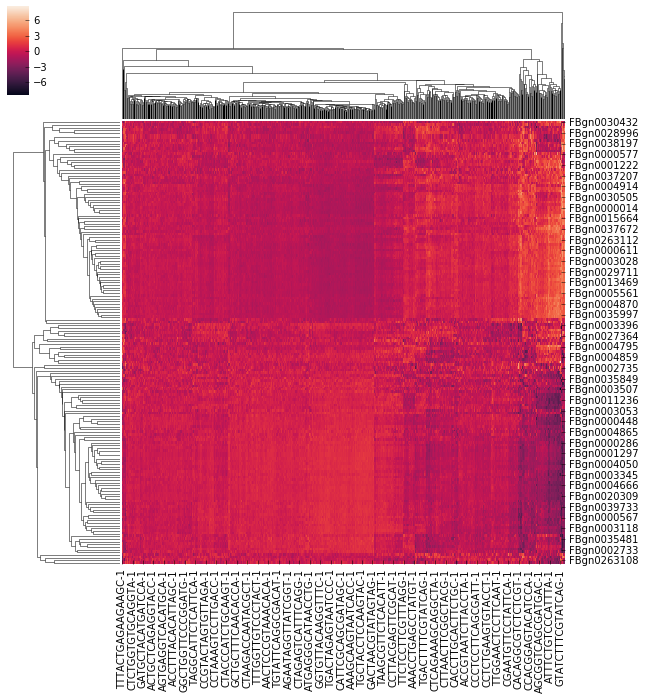

In [203]:
plt.figure(figsize = (40,40))
cluster_obj = sns.clustermap(scaled_df)
plt.show()
# sns.heatmap(scaled_df)

In [182]:
activity.head()

,AAACCTGAGAGGACGG-1,AAACCTGAGCCTATGT-1,AAACCTGGTCAAGCGA-1,AAACCTGTCCGCAGTG-1,AAAGATGGTATCACCA-1,AAAGCAAGTAATCACC-1,AAAGCAATCCTTGGTC-1,AAAGTAGCAAGCGCTC-1,AAAGTAGCAGACGCAA-1,AAAGTAGTCCAAAGTC-1,...,TTGGAACAGTGTTAGA-1,TTGGAACGTGGTCTCG-1,TTGGAACTCCTTCAAT-1,TTGGAACTCTGCGACG-1,TTGTAGGCAGACACTT-1,TTTACTGAGAAGAAGC-1,TTTATGCGTAGAAGGA-1,TTTCCTCCACGGCCAT-1,TTTGCGCAGTACGCGA-1,TTTGGTTGTCCCTACT-1
FBgn0004396,0.252367,0.681946,0.093397,-0.234832,0.342950,0.161820,0.293243,0.495252,-0.122661,-0.152375,...,0.050800,0.243631,0.518641,0.045738,0.176085,0.629565,0.609972,0.754328,0.277270,0.289422
FBgn0004652,0.142670,-0.010579,0.251776,0.110653,0.087436,0.153730,0.262990,0.000133,0.104404,0.184910,...,0.099351,0.328875,0.245714,0.109431,0.107036,-0.588194,0.317589,0.505247,0.025682,0.094672
FBgn0004837,0.037056,0.182607,0.187046,0.255772,0.049246,0.035928,0.154939,-0.018253,0.320208,0.522498,...,0.088766,0.375243,0.032698,0.155889,0.093183,0.224878,-0.094308,1.401170,-0.059234,-0.048401
FBgn0005660,0.816988,1.042714,1.735503,0.954087,0.841216,0.566751,1.208735,1.641312,0.969617,1.358382,...,0.491678,2.853228,1.471412,0.569017,0.735227,1.005909,1.320090,5.101829,0.621058,0.691945
FBgn0032130,-0.471193,-0.495940,-0.967588,-0.451472,-0.539296,-0.332091,-0.565425,-1.003272,-0.330039,-0.964195,...,-0.214047,-1.332916,-0.728725,-0.214030,-0.488114,-0.098212,-0.975141,-2.907441,-0.544066,-0.521685


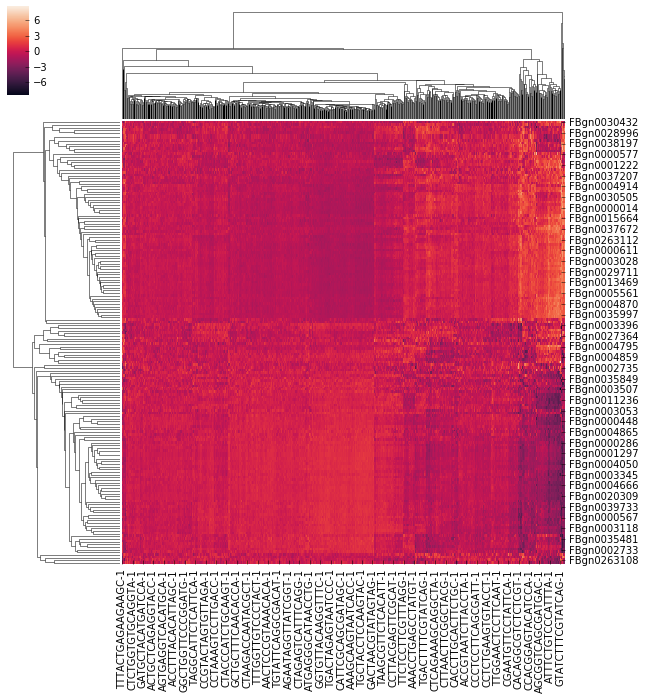

In [183]:
plt.figure(figsize = (60,60))
cluster_obj = sns.clustermap(scaled_df)
plt.show()

In [184]:
scaled_df.shape

(166, 680)

In [66]:
from sklearn import preprocessing
from scipy.cluster.hierarchy import fcluster


In [67]:
clusts = {}
Z = cluster_obj.dendrogram_row.calculated_linkage
for max_clusts in range(2, 20):
    clusts[max_clusts] = fcluster(Z, max_clusts, criterion='maxclust')

In [79]:
cluster_obj.dendrogram_col.calculated_linkage

array([[  463.        ,   622.        ,     4.00345434,     2.        ],
       [  360.        ,   641.        ,     4.02174194,     2.        ],
       [  108.        ,   123.        ,     4.02305099,     2.        ],
       ..., 
       [ 1402.        ,  1403.        ,    58.94197938,   702.        ],
       [  209.        ,  1404.        ,    82.16486341,   703.        ],
       [  522.        ,  1405.        ,   107.36872683,   704.        ]])

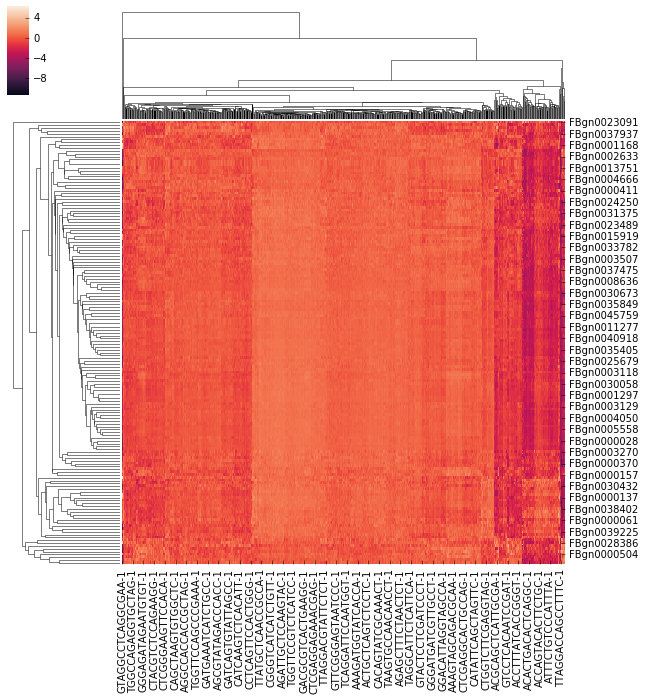

In [84]:
sns.clustermap(scaled_df[clusts[4] == 4])

In [75]:
scaled_df[clusts[4] == 4]

,AAACCTGAGAGGACGG-1,AAACCTGAGCCTATGT-1,AAACCTGGTCAAGCGA-1,AAACCTGTCCGCAGTG-1,AAAGATGGTATCACCA-1,AAAGCAAGTAATCACC-1,AAAGCAATCCTTGGTC-1,AAAGTAGCAAGCGCTC-1,AAAGTAGCAGACGCAA-1,AAAGTAGTCCAAAGTC-1,...,TTGGAACAGTGTTAGA-1,TTGGAACGTGGTCTCG-1,TTGGAACTCCTTCAAT-1,TTGGAACTCTGCGACG-1,TTGTAGGCAGACACTT-1,TTTACTGAGAAGAAGC-1,TTTATGCGTAGAAGGA-1,TTTCCTCCACGGCCAT-1,TTTGCGCAGTACGCGA-1,TTTGGTTGTCCCTACT-1
FBgn0086680,0.612090,-0.810535,-0.480921,0.771183,0.612850,0.924062,0.352551,-0.102349,0.786239,-0.168520,...,1.002343,-1.282889,-0.286326,0.984901,0.820201,-0.861706,-0.961849,-3.952529,0.238437,0.888669
FBgn0004652,0.197894,-1.029175,0.499571,-0.143398,-0.285024,0.262453,0.622246,-0.438684,-0.054398,0.413722,...,0.387132,0.587729,0.255657,0.369590,0.153260,-3.045537,-0.241942,1.301624,-0.731897,0.062901
FBgn0004394,0.301550,-0.028437,0.260483,0.563696,-0.389241,0.142651,0.038942,-0.675792,0.786127,0.291742,...,0.841035,-0.841979,1.092688,-0.040869,-0.194419,-1.350406,-1.945191,1.072369,-0.172963,0.663458
FBgn0004837,-0.100796,-0.061091,-0.395667,0.832164,-0.179825,-0.068152,-0.222354,-1.349033,0.792119,1.442292,...,0.444318,-0.648677,-0.835457,0.420614,-0.156408,0.432366,-1.900073,2.016656,-0.409440,-0.504462
FBgn0011723,0.922795,-0.844093,0.345849,1.341211,0.230919,0.246832,0.833880,-0.353182,1.596242,0.027283,...,1.071791,-0.630217,0.165352,1.226005,0.489215,-0.258509,0.763933,-2.906542,-0.480694,1.163115
FBgn0000576,0.392198,-0.709902,-0.318230,0.690016,0.515077,0.598042,0.215175,-0.331876,0.618692,0.587036,...,0.914976,-1.095809,-0.266741,0.792633,0.463353,0.044095,-1.675939,-2.865342,0.212245,0.833344
FBgn0010433,0.179353,-0.532278,0.042306,0.688234,0.456869,0.627243,-0.414151,-0.533467,0.627477,0.269094,...,1.153867,-1.380578,0.423161,0.887660,0.585764,-0.759297,-2.092548,-3.309135,0.450789,0.830742
FBgn0032130,0.538402,0.620124,-0.574499,0.543822,0.388965,0.851102,0.401684,-0.585344,0.787468,-0.632944,...,1.079578,-1.333981,0.096240,1.110898,0.561629,1.281406,-0.400244,-4.464910,0.376794,0.491496
FBgn0003270,0.170406,-0.012325,-1.282457,0.200529,0.064077,0.726254,0.791654,-0.755932,0.563584,0.116691,...,1.027632,-1.961763,-0.683259,0.710389,0.342825,-0.466498,-0.135303,-4.688523,0.773490,0.852392
FBgn0000472,0.003985,-1.953642,0.280164,-0.104588,-0.610940,0.289325,0.317245,-0.279918,0.946399,0.112586,...,-0.123668,1.151505,0.755980,0.349467,0.307717,-4.150009,-1.934945,1.828432,0.073126,1.063347


In [86]:
in_folder = '~/Dev/inferelator_ng/data/dmel'
exp = pd.read_csv(os.path.join(in_folder, 'expression.tsv'), sep='\t', index_col=0)

In [92]:
expressed_tfs = set(scaled_df.index).intersection(set(exp.index))

In [94]:
expressed_tfs

{'FBgn0000014',
 'FBgn0000097',
 'FBgn0000286',
 'FBgn0000370',
 'FBgn0000504',
 'FBgn0000546',
 'FBgn0000567',
 'FBgn0000568',
 'FBgn0000611',
 'FBgn0000964',
 'FBgn0001078',
 'FBgn0001168',
 'FBgn0001185',
 'FBgn0001222',
 'FBgn0001235',
 'FBgn0001291',
 'FBgn0001297',
 'FBgn0001994',
 'FBgn0002521',
 'FBgn0002609',
 'FBgn0002633',
 'FBgn0002723',
 'FBgn0002733',
 'FBgn0003118',
 'FBgn0003345',
 'FBgn0003396',
 'FBgn0003507',
 'FBgn0003567',
 'FBgn0003870',
 'FBgn0003964',
 'FBgn0004050',
 'FBgn0004396',
 'FBgn0004510',
 'FBgn0004652',
 'FBgn0004837',
 'FBgn0004859',
 'FBgn0004865',
 'FBgn0004870',
 'FBgn0004893',
 'FBgn0004914',
 'FBgn0005612',
 'FBgn0005694',
 'FBgn0011236',
 'FBgn0011648',
 'FBgn0011655',
 'FBgn0013263',
 'FBgn0013753',
 'FBgn0013799',
 'FBgn0014018',
 'FBgn0014343',
 'FBgn0015239',
 'FBgn0015664',
 'FBgn0016076',
 'FBgn0017578',
 'FBgn0020309',
 'FBgn0022699',
 'FBgn0022935',
 'FBgn0023094',
 'FBgn0023215',
 'FBgn0024250',
 'FBgn0027339',
 'FBgn0029711',
 'FBgn00

In [93]:
len(expressed_tfs)

104

In [90]:
nodes['expressed'] = 0

In [101]:
nodes.loc[list(exp.index), 'expressed'] = 1

In [97]:
nodes.index = nodes['id']

In [102]:
nodes.shape

(17772, 3)

In [103]:
exp.index

Index([u'FBgn0085412', u'FBgn0039265', u'FBgn0011336', u'FBgn0038274',
       u'FBgn0039266', u'FBgn0033357', u'FBgn0028689', u'FBgn0030196',
       u'FBgn0038438', u'FBgn0267972',
       ...
       u'FBgn0264834', u'FBgn0283525', u'FBgn0038128', u'FBgn0027057',
       u'FBgn0040010', u'FBgn0010228', u'FBgn0030403', u'FBgn0001098',
       u'FBgn0004868', u'FBgn0265590'],
      dtype='object', length=5332)

In [105]:
## Import Gold Standard from Marbach

In [109]:
fname = '~/Dev/Drosophila_inferelator/S1_integrative_regulatory_networks/flynet_supervised_0.6.txt'
supervised = pd.read_csv(fname, sep='\t', header=None)

In [185]:
supervised.head()

,0,1,2
0,FBgn0004110,FBgn0035954,0.98264
1,FBgn0035769,FBgn0000541,0.97961
2,FBgn0004110,FBgn0004009,0.97875
3,FBgn0004110,FBgn0004862,0.97768
4,FBgn0002914,FBgn0015664,0.97735


In [119]:
# how many unique regulators?
len(set(supervised[0]))
cols = set(supervised[0])

In [120]:
# how many unique targets?
len(set(supervised[1]))
idx = set(supervised[1])

In [123]:
sup_table = pd.DataFrame(np.zeros((len(idx), len(cols))), index=idx, columns=cols)

In [125]:
for (idx, row) in supervised.iterrows():
    col = row[0]
    idx = row[1]
    sup_table.loc[idx, col] = 1

In [128]:
sup_table.sum().sum()

310634.0

In [129]:
fname = '~/Dev/Drosophila_inferelator/Marbach_gold_standard.tsv'
sup_table.to_csv(fname, sep='\t')

In [130]:
net.head()

,regulator,target,beta.sign.sum,beta.non.zero,var.exp.median,combined_confidences,prior
0,FBgn0086680,FBgn0034138,-100.0,100.0,0.718103,0.999922,1.0
1,FBgn0005660,FBgn0030520,-100.0,100.0,0.617789,0.999845,1.0
2,FBgn0008649,FBgn0029888,100.0,100.0,0.563271,0.999751,1.0
3,FBgn0008649,FBgn0000150,100.0,100.0,0.637196,0.999729,1.0
4,FBgn0008646,FBgn0033699,100.0,100.0,0.560055,0.999672,1.0


In [186]:
sup_table.head()

,FBgn0038979,FBgn0038978,FBgn0014018,FBgn0014931,FBgn0026869,FBgn0052121,FBgn0010433,FBgn0015014,FBgn0037620,FBgn0037621,...,FBgn0037876,FBgn0011655,FBgn0039227,FBgn0011656,FBgn0035238,FBgn0029928,FBgn0040366,FBgn0029920,FBgn0045852,FBgn0022935
FBgn0014931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0014930,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0035367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0027562,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FBgn0035031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
net.shape

(114615, 7)

In [187]:
filtered_gs = sup_table.loc[set(net['target']).intersection(sup_table.index), set(net['regulator']).intersection(sup_table.columns)]

In [188]:
filtered_gs.shape

(6124, 140)

In [189]:
filtered_gs.sum().sum()

51495.0

In [190]:
# Percentage of Marbach network that overlaps with our network
filtered_gs.sum().sum() / sup_table.sum().sum() 

0.16577386892613172

In [191]:
# Percentage of our network that overlaps with Marbach
total_marbach_entries = filtered_gs.sum().sum()
non_overlapping = 0
recovered_count = 0
precision = []
recall = []
count = 0
for (idx, row) in net.iterrows():
    tf = row['regulator']
    target = row['target']
    if tf not in filtered_gs.columns or target not in filtered_gs.index:
        non_overlapping += 1
    else:
        count += 1
        if filtered_gs.loc[target, tf] == 1:
            recovered_count += 1
        precision.append(recovered_count / float(count))
        recall.append(recovered_count / total_marbach_entries)
        

In [194]:
expected_random_precision = total_marbach_entries / float(filtered_gs.shape[0] * filtered_gs.shape[1])

In [192]:
recovered_count

7468

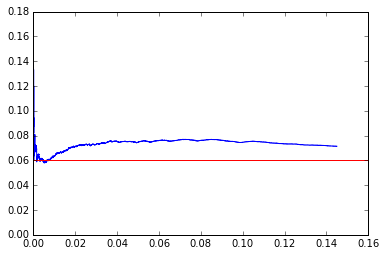

In [195]:
plt.plot(recall, precision)
plt.axhline(y=expected_random_precision, color='r', linestyle='-')
plt.show()
~

In [149]:
filtered_gs.shape

(4811, 272)

In [150]:
non_overlapping

32992

In [152]:
## Overlap of network with Marbach: 
(4811 * 272) / float(len(set(net['target'])) * len(set(net['regulator'])))

0.7482388889905404

In [161]:
expected_random_recall = (net.shape[0] - non_overlapping) / float(4811 * 272)

In [162]:
expected_random_recall

0.062374674459266144